In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Part 5 ~ Houses price
Multy variables linear regression

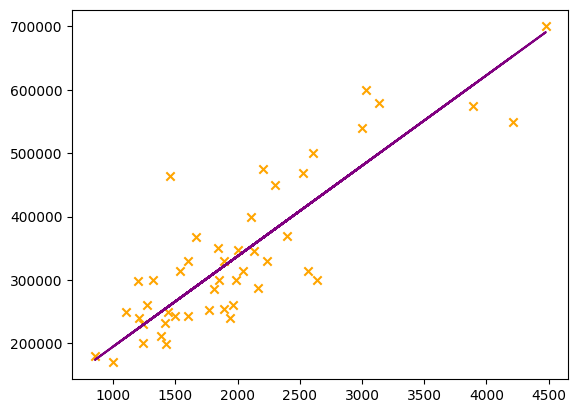

price for a house 1200 meters and 3 rooms : 241816.841


array([[-116069.57993612],
       [ 149174.64752658],
       [-115768.52997767]])

In [4]:
with open('data\\houses.txt', 'r') as f:
    data = f.readlines()

data = [x.strip() for x in data]
data = [x.split(',') for x in data]
data = [[float(x[0]), int(x[1]), float(x[2])] for x in data]
h_size = np.array([x[0] for x in data]).reshape(-1, 1)
h_n_rooms = np.array([x[1] for x in data]).reshape(-1, 1)
h_price = np.array([x[2] for x in data]).reshape(-1, 1)


h = lambda theta, X: np.dot(X, theta)
cost_computation = lambda theta, X, y: (1 / (2 * y.size)) * np.sum((h(theta, X) - y) ** 2)

normalized_eq = lambda X,y : np.invert(np.dot(X.T, X))*np.dot(X.T, y)    


def data_normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean) / std
    return X

X = np.hstack((np.ones((h_size.size, 1)), h_size, h_n_rooms))
X = data_normalization(X)
x = h_size
y = h_n_rooms
z = h_price
theta = theta = np.zeros((X.shape[1], 1))

def gradient_descent(X,y,theta,alpha,iterations):
    m = y.size
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - alpha * (1 / m) * (X.T.dot(h(theta, X) - y))

        cost_history[i] = cost_computation(theta, X, y)
    return theta



theta = gradient_descent(X, z, theta, 0.001, 10000)

plt.scatter(x, z, color='orange', marker='x')

plt.plot(x, h(theta, X), color='purple')
plt.show()

def predict_price(size, n_rooms, theta):
    size = (size - np.mean(h_size)) / np.std(h_size)
    n_rooms = (n_rooms - np.mean(h_n_rooms)) / np.std(h_n_rooms)
    return abs(theta[0] + (size * theta[1]) + (n_rooms * theta[2]))

print(f'price for a house 1200 meters and 3 rooms : {predict_price(1200, 3, theta)[0]:.3f}')
theta

